In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""a self-defined coin: has probability of p falling heads up
take p=0.3 and n=1000 to simulate n coin flips
repeat for p=0.03"""
def proportion_headsup(p, n):
    flips_headsup = np.random.rand(n) < p
    counts = np.cumsum(flips_headsup)
    proportion = counts / np.arange(1, n + 1)
    return proportion

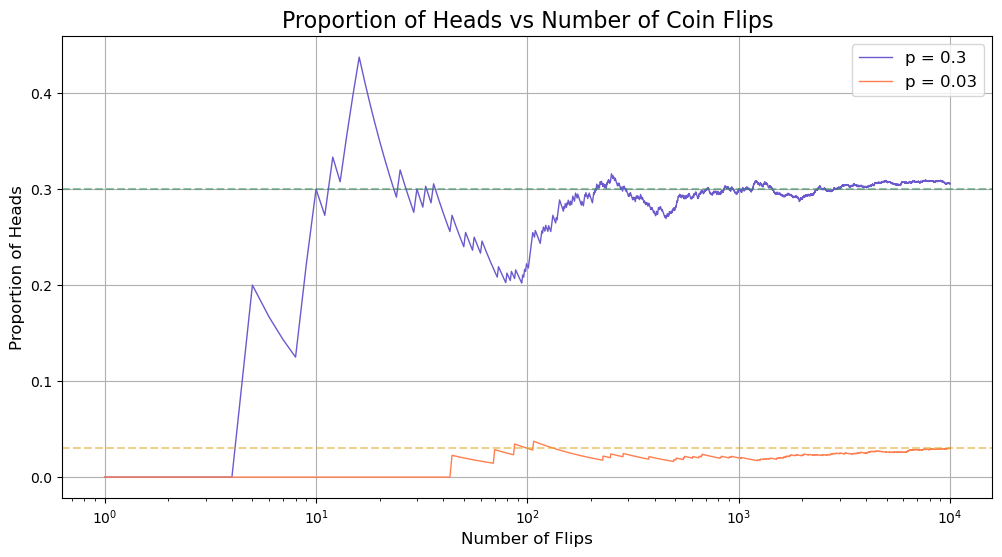

In [3]:
"""ploting"""
p1, p2 = 0.3, 0.03
n = 10000
proportion_headsup1 = proportion_headsup(p1, n)
proportion_headsup2 = proportion_headsup(p2, n)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, n + 1), proportion_headsup1,
         label=f'p = {p1}', linewidth=1, color='#6A5ACD')
plt.plot(np.arange(1, n + 1), proportion_headsup2,
         label=f'p = {p2}', linewidth=1, color='#FF7F50')

plt.axhline(y=p1, color='#2E8B57', linestyle='--', alpha=0.5)
plt.axhline(y=p2, color='#DAA520', linestyle='--', alpha=0.5)
plt.xlabel('Number of Flips', fontsize=12)
plt.ylabel('Proportion of Heads', fontsize=12)
plt.title('Proportion of Heads vs Number of Coin Flips', fontsize=16)
plt.legend(fontsize=12)
plt.xscale('log')
plt.grid(True)
plt.savefig('ch1_coin_flips_proportion_simulation.png', dpi=300)
plt.show()

In [4]:
"""X be the number of heads given the probability of p and the times n
p = 0.3, n = 10, 100 and 1,000
"""
def counts_headsup(p, n):
    flips = np.random.rand(n) < p
    final_counts = np.add.reduce(flips)
    return final_counts

In [5]:
p = 0.3
max_n_flips = 800
n_experiments = 80

average_heads = []
expected_values = []

for n in range(1, max_n_flips + 1):
    results = [counts_headsup(p, n) for _ in range(n_experiments)]
    average_heads.append(np.mean(results))
    expected_values.append(n * p)

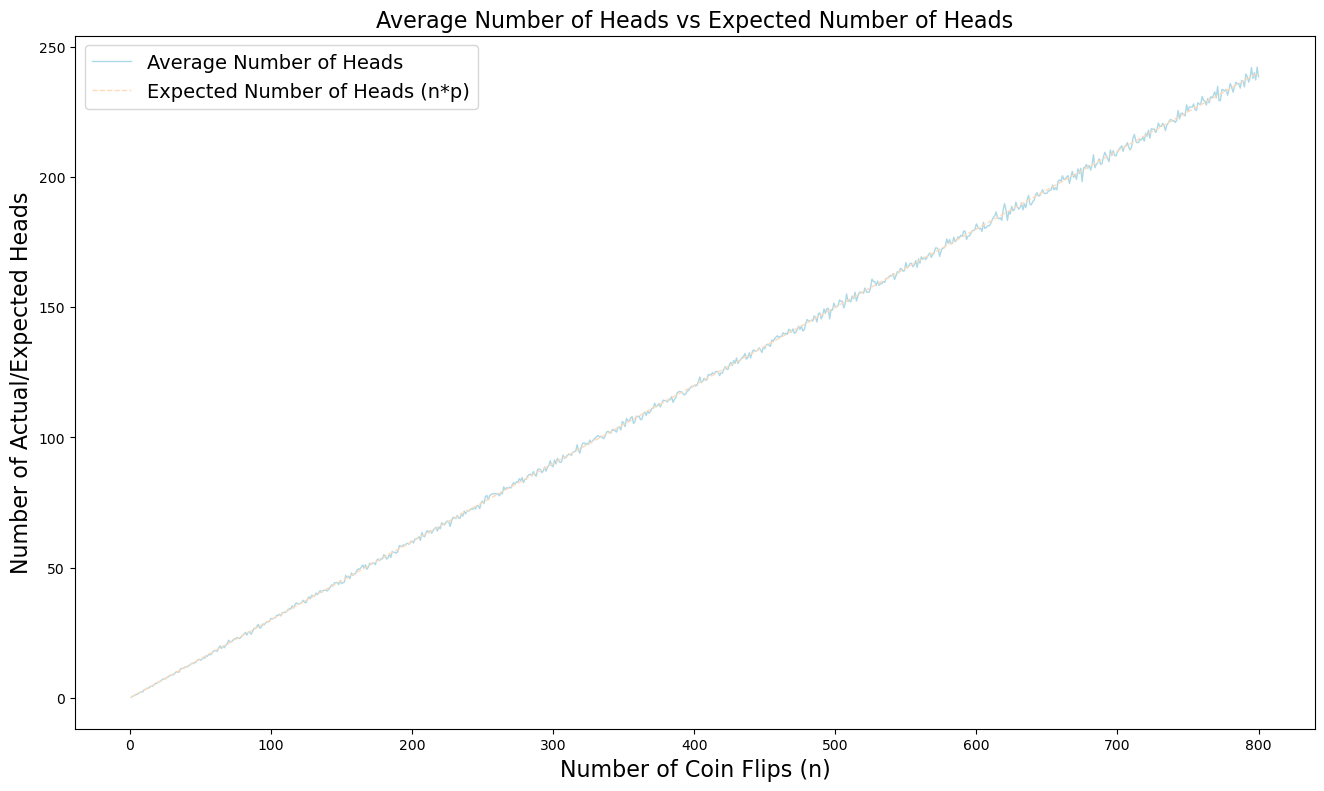

In [6]:
plt.figure(figsize=(16, 9))
plt.plot(range(1, max_n_flips + 1), average_heads,
         label='Average Number of Heads', color='#ADD8E6', linewidth=1)
plt.plot(range(1, max_n_flips + 1), expected_values,
         label='Expected Number of Heads (n*p)', color='#FFDAB9', linestyle='--',linewidth=1)
plt.xlabel('Number of Coin Flips (n)', fontsize=16)
plt.ylabel('Number of Actual/Expected Heads', fontsize=16)
plt.title('Average Number of Heads vs Expected Number of Heads', fontsize=16)
plt.legend(fontsize=14)
plt.savefig('ch1_binomial_simulation.png', dpi=300)
plt.show()

In [7]:
"""tossing a fair die
let A=[2, 4, 6], B=[1, 2, 3, 4], AB=[2, 4]
P(A)=1/2, P(B)=2/3, P(AB)=1/3=P(A)*P(B) they are independent

let C=[1, 2, 3], D=[1, 3, 4, 5, 6], CD=[1, 3]
P(C)=1/2, P(D)=5/6, P(CD)=1/3 they are slightly dependent

let E=[1, 2, 3], F=[1, 2, 3, 4], EF=[1, 2, 3]
P(E)=1/2, P(F)=2/3, P(EF)=1/2 they are strongly dependent
"""

'tossing a fair die\nlet A=[2, 4, 6], B=[1, 2, 3, 4], AB=[2, 4]\nP(A)=1/2, P(B)=2/3, P(AB)=1/3=P(A)*P(B) they are independent\n\nlet C=[1, 2, 3], D=[1, 3, 4, 5, 6], CD=[1, 3]\nP(C)=1/2, P(D)=5/6, P(CD)=1/3 they are slightly dependent\n\nlet E=[1, 2, 3], F=[1, 2, 3, 4], EF=[1, 2, 3]\nP(E)=1/2, P(F)=2/3, P(EF)=1/2 they are strongly dependent\n'

In [8]:
def simulate_dice_rolls(num_rolls):
    return np.random.randint(1, 7, num_rolls)


def calculate_probabilities(rolls, event_a, event_b):
    counts_a = np.add.reduce(np.isin(rolls, event_a))
    counts_b = np.add.reduce(np.isin(rolls, event_b))
    counts_ab = np.add.reduce(np.isin(rolls, np.intersect1d(event_a, event_b)))
    p_a = counts_a / len(rolls)
    p_b = counts_b / len(rolls)
    p_ab = counts_ab / len(rolls)
    return p_a, p_b, p_ab

In [9]:
num_rolls = 1000

A = [2, 4, 6]
B = [1, 2, 3, 4]
p_a, p_b, p_ab = calculate_probabilities(simulate_dice_rolls(num_rolls), A, B)
theo_p_a, theo_p_b, theo_p_ab = 1/2, 2/3, 1/3

C = [1, 2, 3]
D = [1, 3, 4, 5, 6]
p_c, p_d, p_cd = calculate_probabilities(simulate_dice_rolls(num_rolls), C, D)
theo_p_c, theo_p_d, theo_p_cd = 1/2, 5/6, 1/3

E = [1, 2, 3]
F = [1, 2, 3, 4]
p_e, p_f, p_ef = calculate_probabilities(simulate_dice_rolls(num_rolls), E, F)
theo_p_e, theo_p_f, theo_p_ef = 1/2, 2/3, 1/2

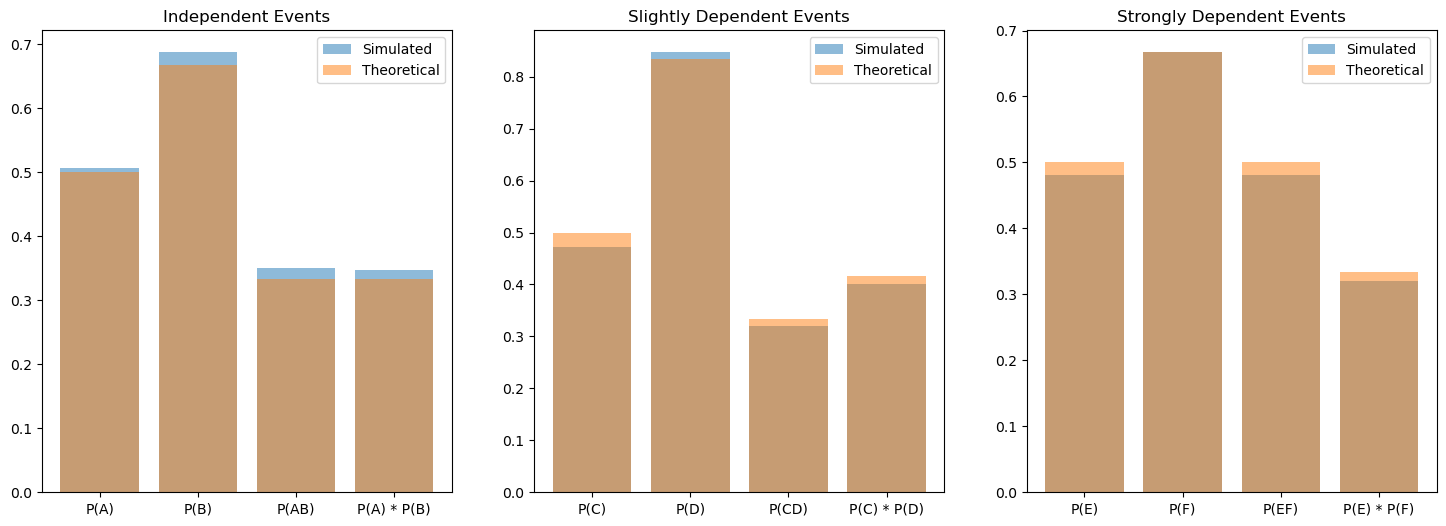

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

events = ['P(A)', 'P(B)', 'P(AB)', 'P(A) * P(B)']
simulated = [p_a, p_b, p_ab, p_a * p_b]
theoretical = [theo_p_a, theo_p_b, theo_p_ab, theo_p_a * theo_p_b]
ax1.bar(events, simulated, alpha=0.5, label='Simulated')
ax1.bar(events, theoretical, alpha=0.5, label='Theoretical')
ax1.set_title('Independent Events')
ax1.legend()

events = ['P(C)', 'P(D)', 'P(CD)', 'P(C) * P(D)']
simulated = [p_c, p_d, p_cd, p_c * p_d]
theoretical = [theo_p_c, theo_p_d, theo_p_cd, theo_p_c * theo_p_d]
ax2.bar(events, simulated, alpha=0.5, label='Simulated')
ax2.bar(events, theoretical, alpha=0.5, label='Theoretical')
ax2.set_title('Slightly Dependent Events')
ax2.legend()

events = ['P(E)', 'P(F)', 'P(EF)', 'P(E) * P(F)']
simulated = [p_e, p_f, p_ef, p_e * p_f]
theoretical = [theo_p_e, theo_p_f, theo_p_ef, theo_p_e * theo_p_f]
ax3.bar(events, simulated, alpha=0.5, label='Simulated')
ax3.bar(events, theoretical, alpha=0.5, label='Theoretical')
ax3.set_title('Strongly Dependent Events')
ax3.legend()

plt.savefig('ch1_independent_vs_dependent.png', dpi=300)
plt.show()